# Task!

1. ให้นิสิตส่งไฟล์ XXXXXX_redwine_hw_regression.ipynb และ Google Colab Link ใน Mycourseville (แทน XXXXXX ด้วยรหัสประจำตัวของนิสิต) ที่รันบนชุดข้อมูล Redwine Quality โดยนิสิตสามารถนำ Notebook ใน Lab มาปรับใช้ได้ โดยให้นิสิตแบ่งข้อมูล Redwine Quality ดังนี้


```
        train_test_split
          • test = 0.25
          • random_state = 101
```

```
        !wget -N https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv  
```


2. ให้นิสิตสร้าง Text Box ลงในไฟล์ Jupyter Notebook ใน Cell ล่างสุด ในไฟล์ข้อที่ 1 และให้เขียนรายงานผลลัพธ์ดังนี้

    • Check linearity assumption to target (corr)

    • Select variables

    • Create model & report equation

    • Predict & evaluate RMSE & R2 on test set

    • Are there any predicted value out of range?

    • Improve your model (post-processing)

    • Re-evaluate RMSE & on R-square on test set

## Library

In [239]:
## Import libraries ,which necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [240]:
plt.rcParams['figure.figsize'] = [7, 5]

## Read Data and explore them

In [241]:
## Download Data winequality_red.csv into my colab
!wget -N https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv

--2024-09-14 12:04:51--  https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7 [following]
--2024-09-14 12:04:52--  https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20e9aa083b7270fba9e353d14f.dl.dropboxusercontent.com/cd/0/inline/CaiH_qdcr2MssPCSm8Zb50FcEfy1IjvAEiB3iY7JIKZjwqEfFdrBCUDOJANxMb4vYz_G3V2VUoRMJboH76tnjHHFXTmtrQMikL6Q9xtYjZprxmEdVyeYD7kJCgrJ34X0jx4/file# [following]
--2024-09-14 12:04:52--  https://uc20e9aa083b7270fba9e353d14f.dl.dropboxusercontent.com/cd/0/inline/C

In [242]:
# Read data
column_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_so2',
                'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df = pd.read_csv('winequality_red.csv', header = None, delimiter=r";", names = column_names).iloc[1::,]
df['quality'] = pd.to_numeric(df['quality'])

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed_acidity         1599 non-null   object
 1   volatile_acidity      1599 non-null   object
 2   citric_acid           1599 non-null   object
 3   residual_sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free_so2              1599 non-null   object
 6   total_sulfur_dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 150.0+ KB


In [244]:
# Change data type
for col in column_names:
  df[col] = pd.to_numeric(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_so2              1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [245]:
df.dropna()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.00,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5
1596,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6
1598,5.9,0.65,0.12,2.0,0.07,32.0,44.0,1.00,3.57,0.71,10.2,5


In [246]:
# dimension
df.shape

(1599, 12)

In [247]:
# correlation
pd.set_option("display.precision", 2)
df.corr(method='pearson')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00,-2.56e-01,0.67,1.15e-01,9.37e-02,-1.54e-01,-0.11,0.67,-0.68,1.83e-01,-0.06,0.12
volatile_acidity,-0.26,1.00e+00,-0.55,1.92e-03,6.13e-02,-1.05e-02,0.08,0.02,0.23,-2.61e-01,-0.20,-0.39
citric_acid,0.67,-5.52e-01,1.00,1.44e-01,2.04e-01,-6.10e-02,0.04,0.36,-0.54,3.13e-01,0.11,0.23
residual_sugar,0.11,1.92e-03,0.14,1.00e+00,5.56e-02,1.87e-01,0.20,0.36,-0.09,5.53e-03,0.04,0.01
chlorides,0.09,6.13e-02,0.20,5.56e-02,1.00e+00,5.56e-03,0.05,0.20,-0.27,3.71e-01,-0.22,-0.13
free_so2,-0.15,-1.05e-02,-0.06,1.87e-01,5.56e-03,1.00e+00,0.67,-0.02,0.07,5.17e-02,-0.07,-0.05
total_sulfur_dioxide,-0.11,7.65e-02,0.04,2.03e-01,4.74e-02,6.68e-01,1.00,0.07,-0.07,4.29e-02,-0.21,-0.19
density,0.67,2.20e-02,0.36,3.55e-01,2.01e-01,-2.19e-02,0.07,1.00,-0.34,1.49e-01,-0.50,-0.17
pH,-0.68,2.35e-01,-0.54,-8.57e-02,-2.65e-01,7.04e-02,-0.07,-0.34,1.00,-1.97e-01,0.21,-0.06
sulphates,0.18,-2.61e-01,0.31,5.53e-03,3.71e-01,5.17e-02,0.04,0.15,-0.20,1.00e+00,0.09,0.25


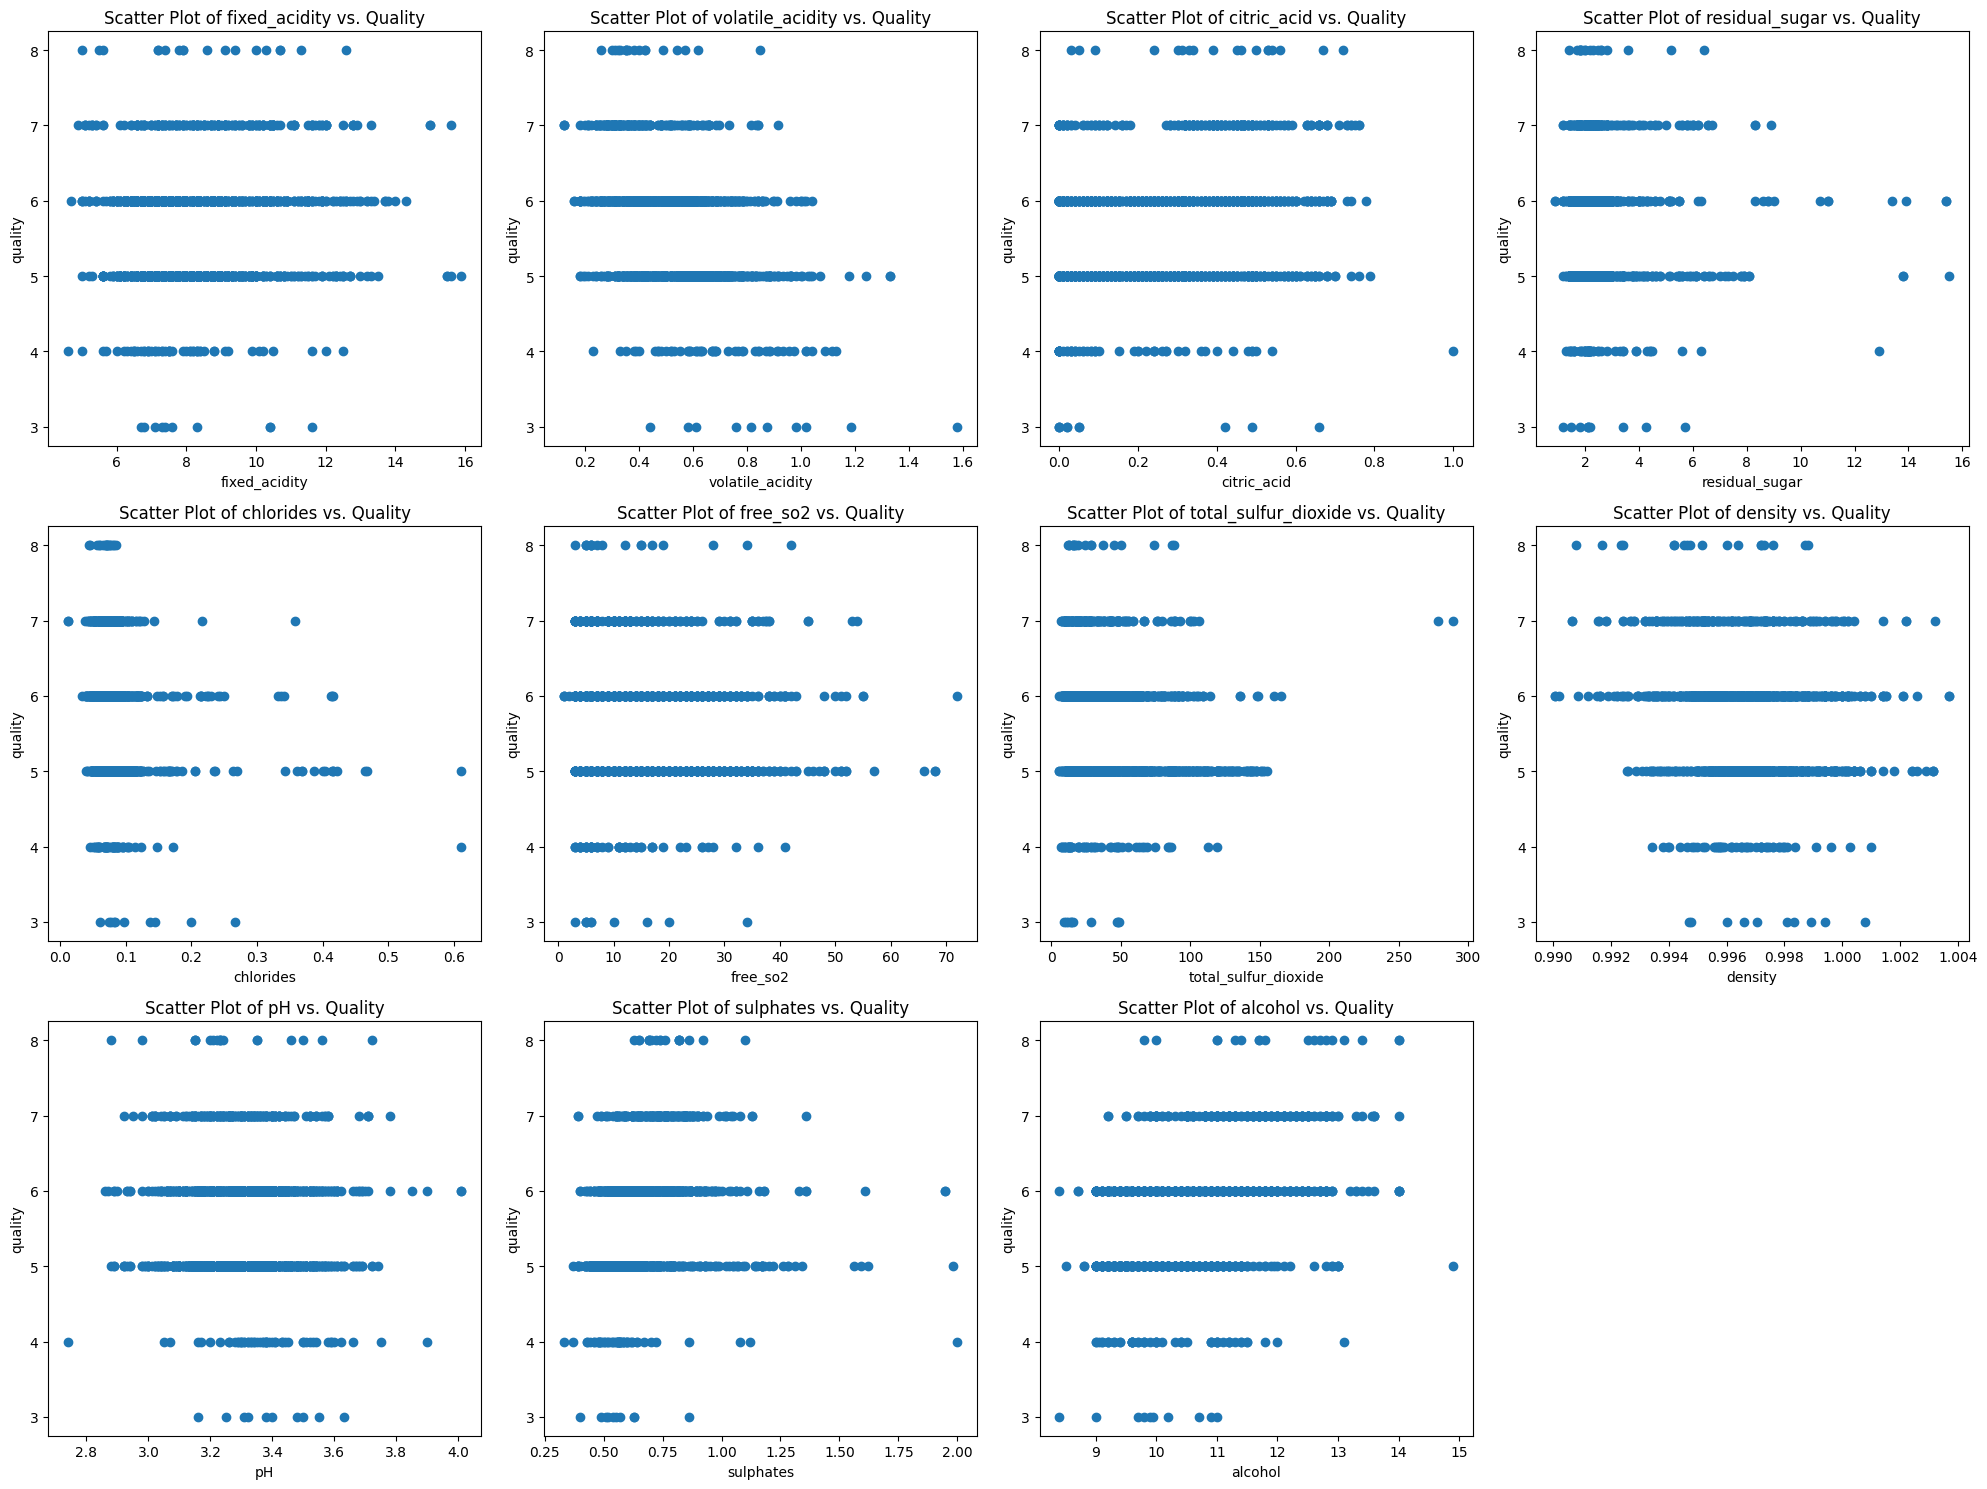

In [248]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of rows and columns for subplots
num_cols = 4  # Adjust as needed
num_rows = int(np.ceil((len(df.columns) - 1) / num_cols))

# Define the desired width and height for each subplot
subplot_width = 5
subplot_height = 5

# Calculate the overall figure size based on subplot dimensions and number of rows/columns
figsize = (subplot_width * num_cols, subplot_height * num_rows)

# Create a figure and axes for subplots with the calculated figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate and plot
i = 0
for col in df.columns:
    if col != 'quality':
        axes[i].scatter(df[col], df["quality"])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('quality')
        axes[i].set_title(f'Scatter Plot of {col} vs. Quality')
        i += 1

# Hide any unused subplots
for j in range(i, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping (optional, might still be helpful)
plt.tight_layout()

# Show the plots
plt.show()

Because quality (variable y) is discrete number, Linear Regression is not properly to use. (But I will assume it can use)

In [249]:
# Correlation with output variable
cor = df.corr()
cor_target = abs(cor["quality"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.1] # Select variable which | correlation | > 0.1
relevant_features

,quality
fixed_acidity,0.12
volatile_acidity,0.39
citric_acid,0.23
chlorides,0.13
total_sulfur_dioxide,0.19
density,0.17
sulphates,0.25
alcohol,0.48
quality,1.00


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_so2', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.9818293  0.6709624  0.31803859 4.53639479 5.67501653 1.24939385
 1.51410919 0.07122077 0.19350176 2.42639346 0.86002106 0.21759721]


<Axes: xlabel='quality', ylabel='Count'>

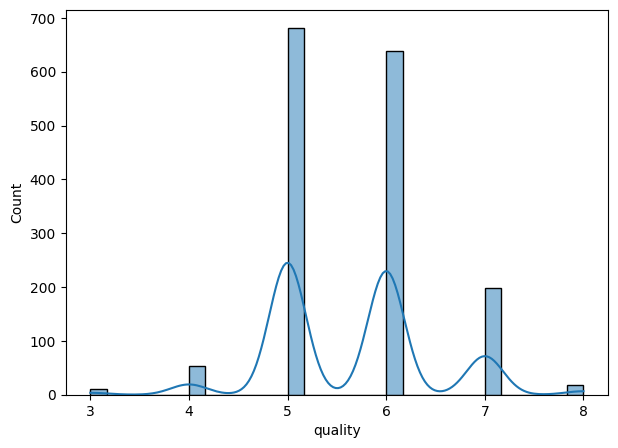

In [250]:
from scipy import stats
#histogram and normal probability plot
print( df.columns )
print( stats.skew(df) )

sns.histplot(df['quality'], kde=True)

# Variable selection

Choose y = f('fixed_acidity', 'volatile_acidity', 'citric_acid', "chlorides" , "total_sulfur_dioxide", "density", "sulphates", "alcohol")

In [251]:
x = df.drop(columns=['quality'])
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_sulfur_dioxide,density,pH,sulphates,alcohol
1,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4
2,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8
3,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8
4,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8
5,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4


In [252]:
# variable selection
X = df.drop(columns=['quality'])
selection_var = X[['fixed_acidity', 'volatile_acidity', 'citric_acid', "chlorides", "total_sulfur_dioxide",
                   "density", "sulphates", "alcohol"]]
y = df['quality']

print(selection_var.shape)
print(y.shape)

(1599, 8)
(1599,)


# Train Data

## First Step

In [253]:
from sklearn.model_selection import train_test_split
#testing data size is of 25% of entire data
test_sizing = 0.25
x_train, x_test, y_train, y_test = train_test_split(selection_var, y, test_size = test_sizing, random_state = 101)

In [271]:
for col in selection_var :
  x_train[col] = pd.to_numeric(x_train[col], errors='coerce')
  x_train.dropna(inplace=True)

In [255]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train, y_train)

### Intercept and Slope

In [256]:
model.intercept_ #20.641042215293556

20.641042215293556

In [257]:
print(selection_var.columns)
model.coef_

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


array([ 6.81244692e-02, -1.15441460e+00, -2.74142023e-01, -1.35147304e+00,
       -2.38832011e-03, -1.82626646e+01,  8.57253541e-01,  2.88426678e-01])

### My Equations:

$$
quality = 0.0682 * fixed-acidity - 1.154 * volatile-acidity - 0.27414 * citric-acid - 1.3515 * chlorides - 0.00239 * total-sulfur-dioxide - 18.26266 * sulphates + 0.28842 * alcohol
$$


### ANOVA TABLE

In [258]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
# สร้างและ train โมเดลอีกครั้ง
model_sm = sm.OLS(y_train,x_train).fit()

print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.244e+04
Date:                Sat, 14 Sep 2024   Prob (F-statistic):                        0.00
Time:                        12:04:57   Log-Likelihood:                         -1129.5
No. Observations:                1199   AIC:                                      2275.
Df Residuals:                    1191   BIC:                                      2316.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Because P - value of **citric_acid = 0.075 is more than 0.05, so them are not significance.**

## Second Step

Remove `critic_acid` variable from equation

### Function to train model

In [259]:
def train_model_reg(selected_variable, predicted_variable, test_sizing = 0.25, random_state = 101):
    # แบ่งข้อมูล train/test เพียงครั้งเดียว
    x_train, x_test, y_train, y_test = train_test_split(selected_variable, predicted_variable,
                                                        test_size=test_sizing, random_state=random_state)

    # แปลงชนิดข้อมูลและจัดการ missing values ใน x_train
    x_train = x_train.apply(pd.to_numeric, errors='coerce')
    x_train = x_train.dropna()

    # ปรับ y_train ให้ตรงกับ x_train หลังจากลบ missing values
    y_train = y_train[x_train.index]

    # เพิ่มค่าคงที่ใน x_train สำหรับ statsmodels
    x_train_with_const = sm.add_constant(x_train)
    #---------------------------------------------------------------------------------------------------
    # สร้างและ train โมเดล statsmodels
    model_sm = sm.OLS(y_train, x_train_with_const).fit()
    #---------------------------------------------------------------------------------------------------
    # Evaluate Model
    lm = LinearRegression()
    model = lm.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #---------------------------------------------------------------------------------------------------
    # สร้าง dictionary สำหรับเก็บผลลัพธ์
    resulted = {
        'selected': selected_variable.columns,
        'intercept': model_sm.params[0],  # intercept จาก statsmodels
        'coef': model_sm.params[1:]        # coefficients จาก statsmodels
    }

    evaluate_table = pd.DataFrame({
    'RMSE': np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4),
    'R-squared': np.round(r2_score(y_test, y_pred), 4),
    'Avg y_pred': np.round(np.mean(y_pred), 4)},
                                  index=[0])
    #---------------------------------------------------------------------------------------------------
    # แสดงตารางสรุปจาก statsmodels
    print(model_sm.summary())

    return [resulted, evaluate_table, y_test, x_test, y_pred]

### Example from step 1

In [272]:
train1 = train_model_reg(X[['fixed_acidity', 'volatile_acidity', 'citric_acid', "chlorides", "total_sulfur_dioxide","density", "sulphates", "alcohol"]], df["quality"], test_sizing = 0.25, random_state = 101)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     93.61
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          1.49e-120
Time:                        12:08:31   Log-Likelihood:                -1128.7
No. Observations:                1199   AIC:                             2275.
Df Residuals:                    1190   BIC:                             2321.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.6410 

<ipython-input-259-8e94ec853590>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'intercept': model_sm.params[0],  # intercept จาก statsmodels


In [273]:
train1[0]

{'selected': Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
        'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol'],
       dtype='object'),
 'intercept': 20.64104221529405,
 'coef': fixed_acidity           6.81e-02
 volatile_acidity       -1.15e+00
 citric_acid            -2.74e-01
 chlorides              -1.35e+00
 total_sulfur_dioxide   -2.39e-03
 density                -1.83e+01
 sulphates               8.57e-01
 alcohol                 2.88e-01
 dtype: float64}

### ANOVA TABLE

In [274]:
selection_var = selection_var.drop(columns=['citric_acid'])

KeyError: "['citric_acid'] not found in axis"

In [275]:
train2 = train_model_reg(selection_var, df["quality"], test_sizing = 0.25, random_state = 101)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          6.12e-121
Time:                        12:08:44   Log-Likelihood:                -1130.2
No. Observations:                1199   AIC:                             2276.
Df Residuals:                    1191   BIC:                             2317.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.8777 

<ipython-input-259-8e94ec853590>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'intercept': model_sm.params[0],  # intercept จาก statsmodels


Because P - value for all variable is less than 0.05 and P - value of ANOVA is less than too, so the model to predict (y) is siginificance to use!.

## Intercept and Slope

In [276]:
train2[0]

{'selected': Index(['fixed_acidity', 'volatile_acidity', 'chlorides',
        'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol'],
       dtype='object'),
 'intercept': 21.877719695801495,
 'coef': fixed_acidity           5.17e-02
 volatile_acidity       -1.03e+00
 chlorides              -1.59e+00
 total_sulfur_dioxide   -2.63e-03
 density                -1.94e+01
 sulphates               8.61e-01
 alcohol                 2.81e-01
 dtype: float64}

My Equations:

$$
 quality = 21.877 + 0.0517* fixed-acidity - 1.03*volatile-acidity - 1.59 * chlorides - 0.002 * total-sulfur-dioxide - 19.4 * density + 0.861 * sulphates + 0.281 * alcohol
 $$

# Evaluate Model

In [277]:
## Show x_test
train2[3]

,fixed_acidity,volatile_acidity,chlorides,total_sulfur_dioxide,density,sulphates,alcohol
679,8.3,0.78,0.08,87.0,1.00,0.53,10.0
1501,7.5,0.72,0.08,15.0,1.00,0.53,9.6
1458,7.6,0.49,0.07,85.0,1.00,0.58,9.0
1080,7.9,0.30,0.05,278.0,0.99,0.51,12.3
910,7.3,0.30,0.06,11.0,0.99,0.52,11.5
...,...,...,...,...,...,...,...
1529,7.9,0.29,0.10,59.0,1.00,0.67,10.1
648,8.3,0.84,0.07,14.0,1.00,0.58,11.0
353,7.7,0.67,0.09,19.0,1.00,0.73,9.3
117,8.3,0.54,0.08,40.0,1.00,0.61,10.0


In [278]:
## Show y_test
train2[2]

,quality
679,5
1501,5
1458,5
1080,7
910,6
...,...
1529,6
648,4
353,5
117,6


### RMSE, R - square, Average of y predicted

#### Model 1

In [279]:
train1[1]

,RMSE,R-squared,Avg y_pred
0,0.73,0.26,5.69


#### Model 2

In [280]:
train2[1]

,RMSE,R-squared,Avg y_pred
0,0.73,0.26,5.69


### Residual Analysis

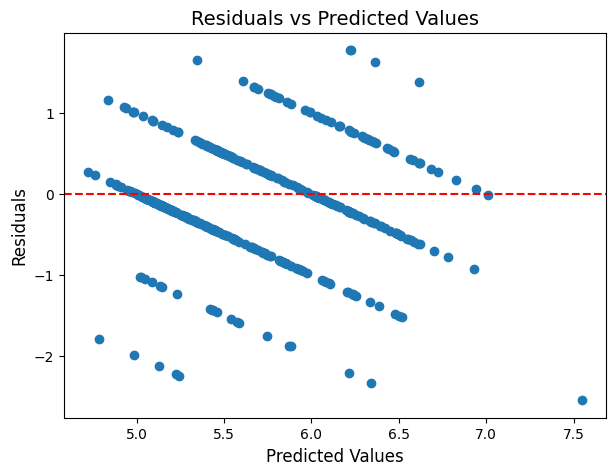

In [281]:
## Residuals vs. Fitted Value
residuals =  train2[2] - train2[4]
plt.scatter(train2[4], residuals)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

plt.title('Residuals vs Predicted Values', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

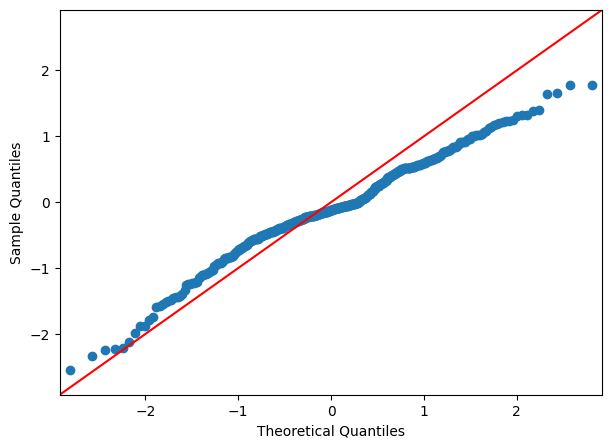

In [282]:
## QQ plot
sm.qqplot(residuals, line='45')
plt.show()

# Conclusion

- จากการการนำข้อมูล redwine มาทำการสร้าง Linear Regression Model แล้ว โดยใช้เกณฑ์ | Corelation | > 0.1 พบว่ามีปัจจัยของ 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides' , 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol' เท่านั้นที่ผ่านเงื่อนไขสำหรับการทำนายของ Quality (y)

- หลังจากทำการสร้างสมการถดถอยพหุคูณหลังจากนำตัวแปร critic_acidity ซึ่งมี P - value > 0.05 ออกเรียบร้อยแล้ว ได้สมการเป็น

$$
 quality = 21.877 + 0.0517* fixed-acidity - 1.03*volatile-acidity - 1.59 * chlorides - 0.002 * total-sulfur-dioxide - 19.4 * density + 0.861 * sulphates + 0.281 * alcohol
 $$

 - ซึ่งมีค่าสำหรับการประเมินต่าง ๆ ดังนี้
    1. RMSE = 0.73
    2. R - squared = 0.26
    3. ค่าเฉลี่ยจากการทำนาย = 5.69

- จากการตรวจสอบข้อสมมติฐานดังกล่าว พบว่า
    1. การกระจายของ Y (Quality) นี้ไม่ได้มีการแจกแจงปกติ
    2. การกระจายตัวของ Error (Residuals) นี้ไม่ได้กระจายตัวอย่างสมมาตร ทำให้ค่าเฉลี่ยโดยรวม ไม่สามารถประมาณเทียบเคียง 0 ได้
    3. จาก QQ Plot พบว่า Error มีการกระจายตัวใกล้เคียงเส้นปกติ จึงสามารถอนุมานได้ว่า Error จากการทำนายนี้มีการกระจายตัวอย่างปกติ


- ข้อเสนอแนะ:
   - เนื่องจากข้อมูลดังกล่าวมีการใช้ข้อมูล X และ Y เป็น Discrete number ทำให้ค่า R - squared ต่ำ และผลลัพธ์จากสมการทำนายนี้ได้ y ออกมาเป็นจำนวนทศนิยม (Continuous number) ซึ่งอาจส่งผลต่อความคลาดเคลื่อนในคะแนนคุณภาพได้
   - สมการดังกล่าวใช้ได้ดีในการทำนายค่า Y ในช่วง [0, 10] เท่านั้น

